<a href="https://colab.research.google.com/github/ReinaldoDiasAbreu/RegressaoLogistica/blob/main/Regress%C3%A3oLogisticaExemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aplicação da Regressão Logística

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
%matplotlib inline

## Base de dados

In [2]:
df = pd.read_csv('admissao.csv')
df.head()

,Exame1,Exame2,Admitido
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Pré processamento dos dados

#### Separando os dados dos exames da variável adimitido


In [3]:
n_features = len(df.columns)-1 
X = np.array(df.drop('Admitido',1))
y = df.iloc[:,n_features:n_features+1].values  

In [4]:
X[0:5,:]

array([[34.62365962, 78.02469282],
       [30.28671077, 43.89499752],
       [35.84740877, 72.90219803],
       [60.18259939, 86.3085521 ],
       [79.03273605, 75.34437644]])

In [5]:
y[0:5]

array([[0],
       [0],
       [0],
       [1],
       [1]])

In [6]:
# Capturando a média e o desvio padrão
mean = X.mean(axis=0)
std = X.std(axis=0)
print("Média:", mean, "\nDesvio Padrão:", std)

Média: [65.64427406 66.22199809] 
Desvio Padrão: [19.36068671 18.48963567]


#### Padronização

Usamos o StandardScaler somente para pardonizar as features  tornando-as mais manejáveis para o modelo.

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X[0:5,:])

[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]]


#### Função insert_ones para incluir uma coluna com valores 1 no inicio do vetor

In [8]:
def insert_ones(X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X),axis=1)

#### Criando vetor W's de acordo com o número de features

In [9]:
w = np.random.rand(1,n_features+1) ## valores entre 0 e 1
w

array([[0.1012261 , 0.73676535, 0.49549865]])

### Definindo a Função Logística

In [10]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z))

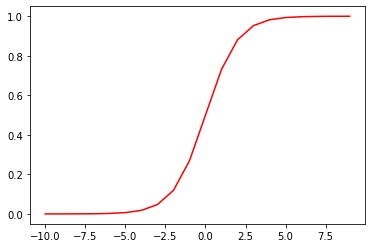

In [11]:
# EXEMPLIFICANDO GRÁFICO DA FUNÇÃO SIGMOID
nums = np.arange(-10, 10, step=1)
fig, ax = plt.subplots(figsize=(6,4))  
ax.plot(nums, sigmoid(nums), 'r')

### Binary Cross Entropy

Essa é a função de custo aplicada a nossa função logística, ela realiza o somatórios dos erros de cada predição dividido pela quantidade de elementos do dataset.

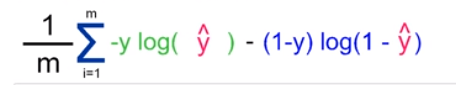

In [12]:
def binary_cross_entropy(w, X, y):    
    m = len(X)
    parte1 = np.multiply(-y, np.log(sigmoid(X @ w.T)))
    parte2 = np.multiply((1 - y), np.log(1 - sigmoid(X @ w.T)))
    somatorio = np.sum(parte1 - parte2)
    return  somatorio/m

### Gradiente Descendente

Usado para encontrar, de forma iterativa, os valores dos parâmetros que minimizam determinada função de interesse.

A diferença é que para termos a regressão logistica estamos aplicando a nossa sigmoid a regressão.

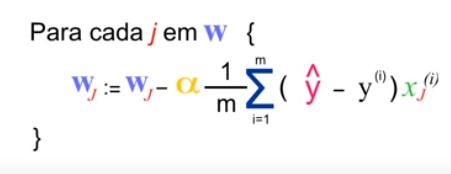

In [13]:
def gradient_descent(w, X, y, alpha, epoch):
    cost = np.zeros(epoch)
    for i in range(epoch):
        w = w - (alpha/len(X)) * np.sum((sigmoid(X @ w.T) - y)*X, axis=0)
        cost[i] = binary_cross_entropy(w, X, y)
    return w, cost

## Inicializando o Modelo

In [14]:
# Inclui uma coluna com valores 1
X = insert_ones(X)
print(X[0:6, :])

[[ 1.         -1.60224763  0.63834112]
 [ 1.         -1.82625564 -1.2075414 ]
 [ 1.         -1.53903969  0.3612943 ]
 [ 1.         -0.28210129  1.0863683 ]
 [ 1.          0.69152826  0.49337794]
 [ 1.         -1.06199728 -0.5357394 ]]


In [15]:
# Definir a taxa de aprendizado e interações
alpha = 0.01 # aprendizado
epoch = 10000 # interação

In [16]:
# Treina o modelo
w, cost = gradient_descent(w, X, y, alpha, epoch)

Text(0.5, 1.0, 'Erro vs. Iterações')

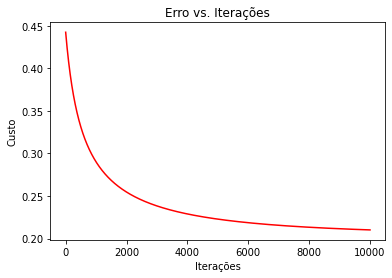

In [17]:
# Custo Calculado
fig, ax = plt.subplots()  
ax.plot(np.arange(epoch), cost, 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Iterações')

In [18]:
# Valores de W calculados
print(w)

[[1.27341705 3.05300911 2.81710405]]


## Realizando Classificações

In [18]:
# Aqui aplicamos nossa função de classificação sigmoid com os valores de w treinados
# e verificamos sua classificação de acordo com o limiar definido (padrão: 50%) 
def predict(w, X, threshold=0.5):
    p = sigmoid(X @ w.T) >= threshold
    return (p.astype('int'))

In [19]:
def classifica(obj, w):
  print("Probabilidade: ", sigmoid(obj @ w.T))
  print("Predição: ", predict(w, obj))

#### Testando Modelo

In [20]:
# TESTANDO PARA PESSOA 1
pessoa1 = np.array([[82, 60]])
pessoa1 = (pessoa1 - mean)/std # Normalização
pessoa1 = insert_ones(pessoa1)
classifica(pessoa1, w)

Probabilidade:  [[0.94895444]]
Predição:  [[1]]


In [21]:
# TESTANDO PARA PESSOA 2
pessoa2 = np.array([[40, 60]])
pessoa2 = (pessoa2 - mean)/std  # Normalização
pessoa2 = insert_ones(pessoa2)
classifica(pessoa2, w)

Probabilidade:  [[0.02321152]]
Predição:  [[0]]


#### Observações sobre o cálculo

Tudo é baseado na definição da regresão linear. No caso abaixo a regressão linear múltipla que trata de mais de uma variável independente.

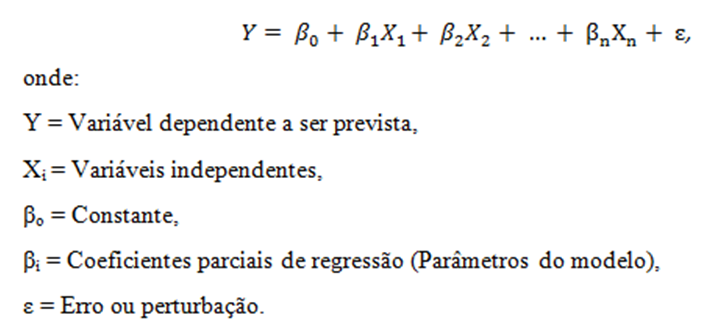

In [22]:
# Transposta dos coeficientes
w.T

array([[1.28206629],
       [3.07109529],
       [2.83453295]])

In [23]:
# Valores X1 e X2 da pessoa1 normalizados
pessoa1

array([[ 1.        ,  0.84479059, -0.33651275]])

In [24]:
# Realizo um produto escalar
pessoa1 @ w.T

array([[2.92264222]])

In [25]:
# Aplico o valor estimado na sigmoid e assim temos nossa chance
sigmoid(pessoa1 @ w.T)

array([[0.94895444]])

## Resumo do Código

In [26]:
import numpy as np  

class LogisticRegression():
  def __init__(self, alpha = 0.01, epoch = 1000):
    self.alpha = alpha # taxa de aprendizado         
    self.epoch = epoch # iterações de treino
    self.pesos = []
    self.custo = []

  def __repr__(self):
    return f"Taxa Aprend: { self.alpha} - Inter: {self.epoch} - Pesos:  {self.pesos}"

  def cost(self):
    return self.custo

  def insert_ones(self, X):
    ones = np.ones([X.shape[0],1])
    return np.concatenate((ones,X), axis=1)

  def sigmoid(self, z):
    return 1 / ( 1 + np.exp(-z))

  def binary_cross_entropy(self, w, X, y):    
    m = len(X)
    parte1 = np.multiply(-y, np.log(self.sigmoid(X @ w.T)))
    parte2 = np.multiply((1 - y), np.log(1 - self.sigmoid(X @ w.T)))
    somatorio = np.sum(parte1 - parte2)
    return  somatorio/m

  def gradient_descent(self, w, X, y):
    cost = np.zeros(self.epoch)
    for i in range(self.epoch):
        w = w - (self.alpha/len(X)) * np.sum((self.sigmoid(X @ w.T) - y)*X, axis=0)
        cost[i] = self.binary_cross_entropy(w, X, y)
    return w, cost
  
  def fit(self, X, y):
    n_features = len(X[0,:])
    w = np.random.rand(1, n_features+1)
    X = insert_ones(X)
    w, cost = self.gradient_descent(w, X, y)
    self.pesos = w
    self.custo = cost
  
  def predict(self, X, threshold=0.5):
    X = self.insert_ones(X)
    c = self.sigmoid(X @ self.pesos.T)
    p = c[0][0] >= threshold
    return p, c[0][0]

### Exemplo usando a classe

In [27]:
# Inicializo a classe
RegLog = LogisticRegression(alpha= 0.01, epoch = 1000)
# Leitura do dataset
df2 = pd.read_csv('titanic_data.csv', sep=',')
df2 = df2.dropna()
df2

,Pclass,Sex,Age,Survived
0,3,0,22.0,0
1,1,1,38.0,1
2,3,1,26.0,1
3,1,1,35.0,1
4,3,0,35.0,0
...,...,...,...,...
885,3,1,39.0,0
886,2,0,27.0,0
887,1,1,19.0,1
889,1,0,26.0,1


In [28]:
df2[["Pclass", "Sex", "Age", "Survived"]].describe()

,Pclass,Sex,Age,Survived
count,714.000000,714.000000,714.000000,714.000000
mean,2.236695,0.365546,29.699118,0.406162
std,0.838250,0.481921,14.526497,0.491460
min,1.000000,0.000000,0.420000,0.000000
25%,1.000000,0.000000,20.125000,0.000000
50%,2.000000,0.000000,28.000000,0.000000
75%,3.000000,1.000000,38.000000,1.000000
max,3.000000,1.000000,80.000000,1.000000


In [29]:
n_features = len(df2.columns)-1 
X = np.array(df2.drop('Survived',1))
y = df2.iloc[:,n_features:n_features+1].values  

# AQUI PODE SER REALIZADA UMA NORMALIZAÇÃO SE NECESSÁRIO
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X = scaler.transform(X)

mean = X.mean(axis=0) # Média para normalizar os testes se necessário
std = X.std(axis=0) # Desvio Padrão para normalizar os testes se necessário

In [34]:
# Treinamento do modelo
RegLog.fit(X,y)
print(RegLog)

Taxa Aprend: 0.01 - Inter: 1000 - Pesos:  [[ 0.29451856 -0.54928096  1.63720884 -0.03421786]]


Text(0.5, 1.0, 'Erro vs. Iterações')

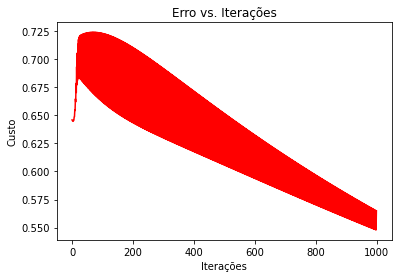

In [35]:
fig, ax = plt.subplots()  
ax.plot(np.arange(1000), RegLog.cost(), 'r')  
ax.set_xlabel('Iterações')  
ax.set_ylabel('Custo')  
ax.set_title('Erro vs. Iterações')

In [36]:
# Definindo testes
rose = np.array([[1, 1, 17]])
jack = np.array([[3, 0, 20]])
eu = np.array([[2, 0, 22]])

# Normalização do teste se necessário
#t1 = (t1 - mean)/std 
#t2 = (t2 - mean)/std 

# Realiza a predição de acordo o limiar indicado
p1 = RegLog.predict(rose, 0.5)
print("Prob1: ", p1)
p2 = RegLog.predict(jack, 0.5)
print("Prob2: ", p2)
p3 = RegLog.predict(eu, 0.5)
print("Prob3: ", p3)

Prob1:  (True, 0.6901333369756718)
Prob2:  (False, 0.1153030141612923)
Prob3:  (False, 0.1741010726812587)
